In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert_rgb_to_gray_level(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j] = get_distance(im_1[i,j,:])
    return im_2


In [3]:
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c = v[0],v[1],v[2]
    w1,w2,w3 = w[0],w[1],w[2]
    d = ((a**2)) * w1 + (b**2) * (w2 + (c**2) *w3)**.5
    return d

In [22]:
def get_mask_for_edge(): # sobel filtresi
    return np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)

def apply_mask_for_edge(part_of_image): # fotoğrafın 3x3 lük kısmına filtreyi uygulama
    mask = get_mask_for_edge()
    return sum(sum(part_of_image * mask))

def get_edges(gray_level_image):
    m = gray_level_image.shape[0]
    n = gray_level_image.shape[1]
    
    new_img = np.zeros((m,n))
    
    for i in range(3,m-3):
        
        for j in range(3,n-3):
            
            poi = gray_level_image[i-1:i+2,j-1:j+2]
            
            new_img[i,j] = apply_mask_for_edge(poi)
            
    return new_img
    

In [14]:
poi_1 = get_mask_for_edge()

apply_mask_for_edge(poi_1)


12

In [23]:
im_with_edges = get_edges(im_2)

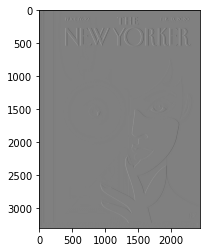

In [24]:
plt.imshow(im_with_edges,cmap = 'gray')
plt.show()

In [7]:
file = 'new_yorker_camera.png'
file_2 = 'The-original-cameraman-image.png'
im_1 = plt.imread(file)
im_2 = convert_rgb_to_gray_level(im_1)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

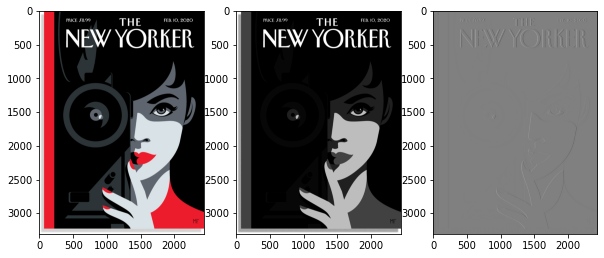

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(im_1)
plt.subplot(1,3,2),plt.imshow(im_2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(im_with_edges,cmap='gray')
plt.show()
